Enlace de los datos: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318074 sha256=fbf037a6600ac072a4d921b0d408c6ae4460e06c75bb775d29b7cdaabea5f51a
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('corrplot')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpEZ2mtD/downloaded_packages’



In [ ]:
%%R
library(corrplot)

In [ ]:
%%R
install.packages("caret")

(as ‘lib’ is unspecified)
















































































































































	‘/tmp/RtmpEZ2mtD/downloaded_packages’



In [ ]:
%%R
library(caret)

In [ ]:
%%R
require(tidyverse)



✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()



In [ ]:
from  google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%R
datos<-read.csv("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning clase/Datos/healthcare-dataset-stroke-data.csv")

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11% del total de muertes.
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

1) id: identificador único del registro.

2) gender: género de la persona a la que pertenece el registro el cual puede ser ‘Male’, ‘Female’, o ‘Other’.

3) age: corresponde con las edades de las personas, donde el promedio de las personas encuestadas es de 43 años.

4) hypertension: indica si la persona tiene hipertensión. 0 se usa para afirmar que no tiene hipertensión y 1 para afirmar que sí tiene hipertensión.

5) heart_disease: señala si las personas sufren de enfermedades cardiacas. 0 se usa para indicar que no sufre enfermedades cardíacas y 1 para indicar que sufre una enfermedad cardiaca.

6) ever_married: indica si la persona se ha casado. En este caso se usa ‘No’ o ‘Yes’.

7) work_type: indica el tipo de trabajo de la persona. Las etiquetas en este caso son ‘Never worked’, ‘Govt_Jov’, ‘Private’, ‘Self-employed’ y ‘children’.

8) Residence_type: indica el tipo de zona donde vive la persona. En este caso las etiquetas son dos: ‘Rural’ y ‘Urban’.

9) avg_glucose_level: indica el nivel de glucosa en promedio de una persona. El promedio inicial de los registro en esta variable se encuentra en 106.14 mg/dL

10) bmi:indica acerca del índice de masa corporal de una persona. El promedio de esta variable en los datos recolectados es de 28.8.

11) smoking_status: indica si la persona es fumadora o ha sido fumadora. las etiquetas de esta variable son ‘formerly smoked’, ‘never smoked’, ‘smokes’ y ‘Unknown’ (esa etiqueta se usó cuando no fue posible obtener ese dato del paciente).

12) stroke: indica si el paciente ha sufrido un accidente cerebrovascular. Se usa 1 para indicar que si lo ha sufrido y 0 para indicar que no lo ha sufrido.



In [ ]:
%%R
head(datos)

     id gender age hypertension heart_disease ever_married     work_type
1  9046   Male  67            0             1          Yes       Private
2 51676 Female  61            0             0          Yes Self-employed
3 31112   Male  80            0             1          Yes       Private
4 60182 Female  49            0             0          Yes       Private
5  1665 Female  79            1             0          Yes Self-employed
6 56669   Male  81            0             0          Yes       Private
  Residence_type avg_glucose_level  bmi  smoking_status stroke
1          Urban            228.69 36.6 formerly smoked      1
2          Rural            202.21  N/A    never smoked      1
3          Rural            105.92 32.5    never smoked      1
4          Urban            171.23 34.4          smokes      1
5          Rural            174.12   24    never smoked      1
6          Urban            186.21   29 formerly smoked      1


In [ ]:
%%R
summary(datos)

       id           gender               age         hypertension    
 Min.   :   67   Length:5110        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Mode  :character   Median :45.00   Median :0.00000  
 Mean   :36518                      Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                      3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease     ever_married        work_type         Residence_type    
 Min.   :0.00000   Length:5110        Length:5110        Length:5110       
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.05401                                                           
 3rd Qu.:0.00000                                                           
 Max.   :1.00000                                      

Par el análisis podemos dejar de lado el id por los que nuestras variables de interés corresponderan con gender,age, hypertension, heart_disease, ever_married, work_type, residence_type,avg_glucose, bmi, smoking_status, y stroke (esta última corresponda a la variable que intentamos explicar).

In [ ]:
%%R
datos<-datos[,-which(names(datos)=="id")]

In [ ]:
%%R
sum(is.na(datos$bmi))

[1] 0


Para este momento no nos encontramos con  datos vacios por lo que no será necesario borrar datos vacios para nuestro análsis.

In [ ]:
%%R
sapply(datos,class)

           gender               age      hypertension     heart_disease 
      "character"         "numeric"         "integer"         "integer" 
     ever_married         work_type    Residence_type avg_glucose_level 
      "character"       "character"       "character"         "numeric" 
              bmi    smoking_status            stroke 
      "character"       "character"         "integer" 


La función anterior la aplicamos para poder ver a cuál tipo de variable corresponden cada una de las columnas de nuestros datos. Acá identificamos que tenemos variables de tipo caracter que no nos servirán para poder realizar el análisis sin realizarles un procesamiento, por esto vamos a transformar a factor gender, ever_merried, work_type, Residence_type, smoking_satus a tipo factor y la variable bmi la transformaremos a tipo numeric.

Además de las variables anteriores vamos a transformar hypertension, heart_disease y stroke a tipo factor.


In [ ]:
%%R
datos$gender<-as.factor(datos$gender)
datos$ever_married<-as.factor(datos$ever_married)
datos$work_type<-as.factor(datos$work_type)
datos$Residence_type<-as.factor(datos$Residence_type)
datos$smoking_status<-as.factor(datos$smoking_status)
datos$bmi<-as.numeric(datos$bmi)
datos$hypertension<-as.factor(datos$hypertension)
datos$heart_disease<-as.factor(datos$heart_disease)
datos$stroke<-as.factor(datos$stroke)


In [ ]:
%%R
sapply(datos,class)

           gender               age      hypertension     heart_disease 
         "factor"         "numeric"          "factor"          "factor" 
     ever_married         work_type    Residence_type avg_glucose_level 
         "factor"          "factor"          "factor"         "numeric" 
              bmi    smoking_status            stroke 
        "numeric"          "factor"          "factor" 


In [ ]:
%%R
summary(datos)

    gender          age        hypertension heart_disease ever_married
 Female:2994   Min.   : 0.08   0:4612       0:4834        No :1757    
 Male  :2115   1st Qu.:25.00   1: 498       1: 276        Yes:3353    
 Other :   1   Median :45.00                                          
               Mean   :43.23                                          
               3rd Qu.:61.00                                          
               Max.   :82.00                                          
                                                                      
         work_type    Residence_type avg_glucose_level      bmi       
 children     : 687   Rural:2514     Min.   : 55.12    Min.   :10.30  
 Govt_job     : 657   Urban:2596     1st Qu.: 77.25    1st Qu.:23.50  
 Never_worked :  22                  Median : 91.89    Median :28.10  
 Private      :2925                  Mean   :106.15    Mean   :28.89  
 Self-employed: 819                  3rd Qu.:114.09    3rd Qu.:33.10  
      

In [ ]:
%%R
sum(is.na(datos))

[1] 201


In [ ]:
%%R
datos<-na.omit(datos)

bmi (indice de masa corporal) estaba siendo tomado como caracter por esta razón en los campos donde no habia una dato se aceptaba como caracter N/A y por tanto no estaba vacio, pero debido a que, para realizar el análisis transformamos bmi a numérica los N/A se convirtieron en campos vacios por lo cual debemos eliminar estos valores con ***na.omit(datos)***



In [ ]:
%%R
col_f=filter(datos,stroke=="1")
col_num=col_f[,-which(sapply(col_f,class)=="factor")]

Creamos otra tabla de datos que solo incluya las variables que no sean de tipo numérico y que hayan sufrido accidentes cerebrovasculares para poder observar cual es su distribución

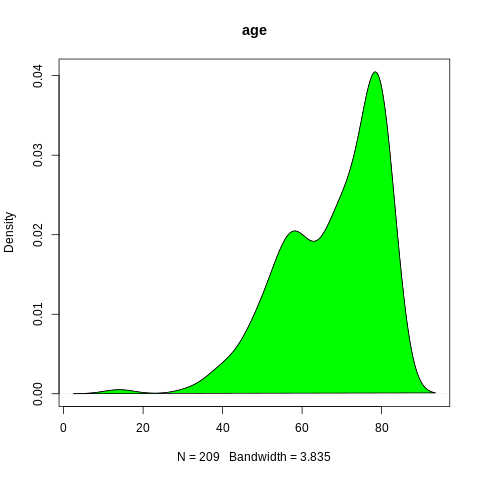

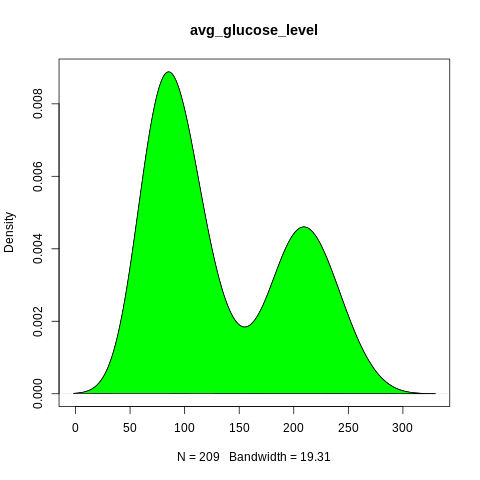

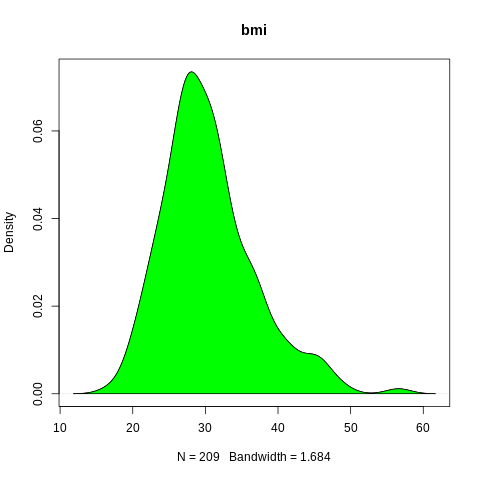

In [ ]:
%%R

for (col in 1:dim(col_num)[2]){
  var<-col_num[,col]
  d<-density(var)
  plot(d,main=names(col_num[col]))
  polygon(d,col="green")
}

Con el bucle recorremos las columnas de la tabla de datos y asi generamos la distribución de cada una de las variables numéricas.

In [ ]:
%%R
correlacion<-cor(col_num)

Generamos la matriz de correlación con los datos numericos, pues este método solo tiene sentido con datos numéricos o de tipo continuo.

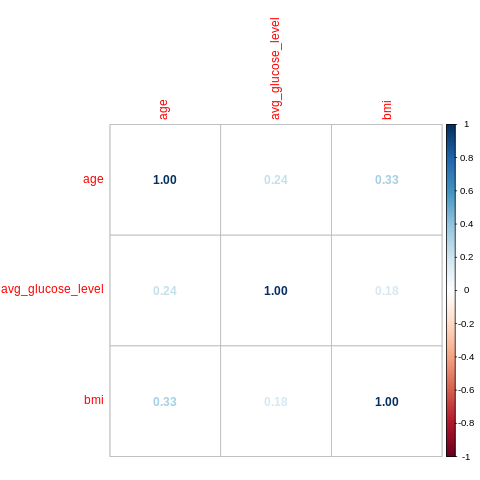

In [ ]:
%%R
corrplot(correlacion,method="number",number.cex=1)

In [ ]:
%%R
col_fac<-datos[,-which(sapply(datos,class)=='numeric')]

In [ ]:
%%R
head(col_fac)

  gender hypertension heart_disease ever_married     work_type Residence_type
1   Male            0             1          Yes       Private          Urban
3   Male            0             1          Yes       Private          Rural
4 Female            0             0          Yes       Private          Urban
5 Female            1             0          Yes Self-employed          Rural
6   Male            0             0          Yes       Private          Urban
7   Male            1             1          Yes       Private          Rural
   smoking_status stroke
1 formerly smoked      1
3    never smoked      1
4          smokes      1
5    never smoked      1
6 formerly smoked      1
7    never smoked      1


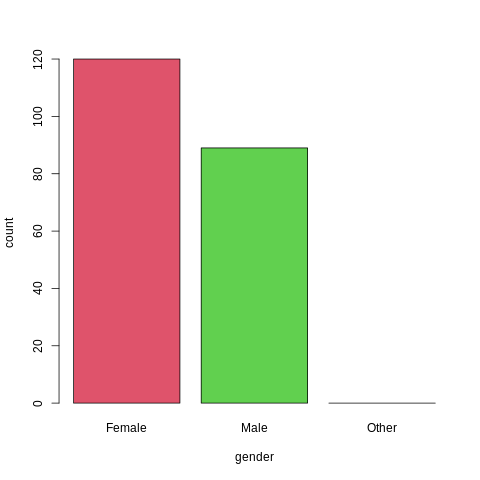

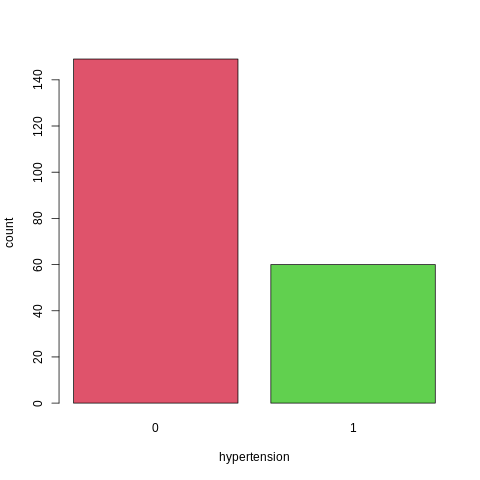

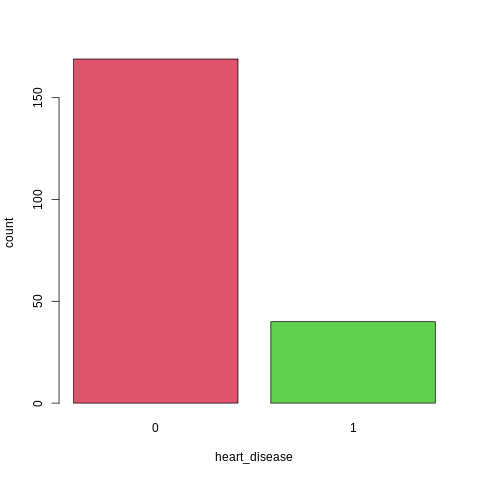

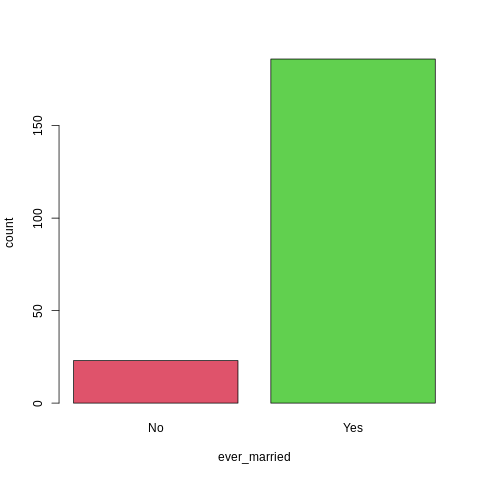

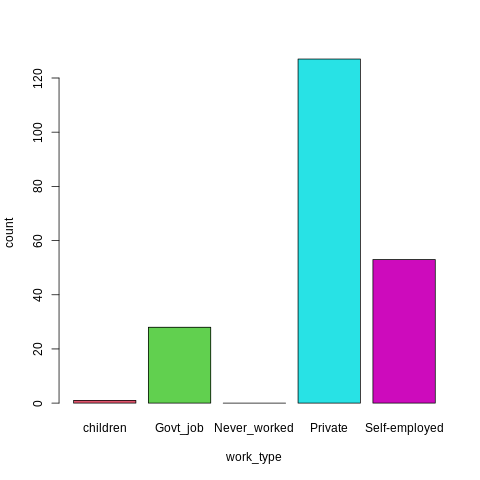

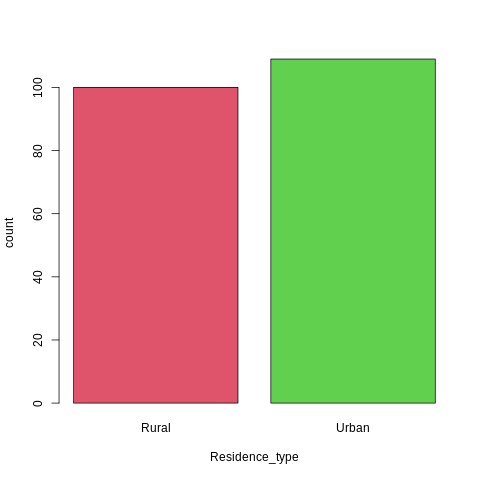

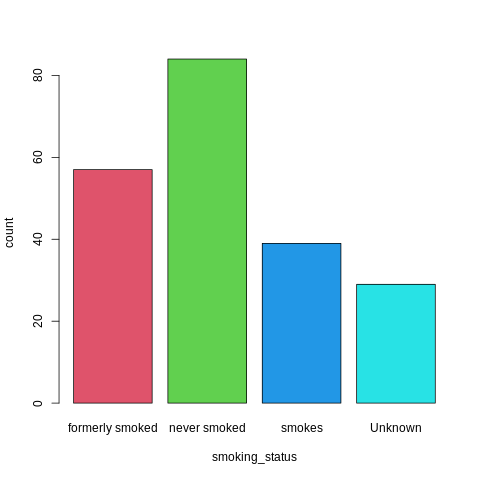

In [ ]:
%%R
for (i in names(datos)){
    if ((class(datos[,i])=="factor")&(i!="stroke")){
        filtro<-filter(datos,stroke=="1")
        plot(filtro[,i],xlab=i,ylab="count",col=50:60)
        }
}

En esta sección se creo un bucle para recorrer las columnas del conjunto de datos. Además, se creo un condicional para generar gráficos de barras para los datos que sean de tipo factor y que correspondan con registro de personas que han sufrido accidentes cerebrovasculares (por esta razón el filtro de stroke=="1"). En col dentro de pol se define un rango de colores para que las barras de las gráficas se diferencien.

In [ ]:
%%R
sum(is.na(datos))

[1] 0


In [ ]:
%%R
summary(datos)

    gender          age        hypertension heart_disease ever_married
 Female:2897   Min.   : 0.08   0:4458       0:4666        No :1705    
 Male  :2011   1st Qu.:25.00   1: 451       1: 243        Yes:3204    
 Other :   1   Median :44.00                                          
               Mean   :42.87                                          
               3rd Qu.:60.00                                          
               Max.   :82.00                                          
         work_type    Residence_type avg_glucose_level      bmi       
 children     : 671   Rural:2419     Min.   : 55.12    Min.   :10.30  
 Govt_job     : 630   Urban:2490     1st Qu.: 77.07    1st Qu.:23.50  
 Never_worked :  22                  Median : 91.68    Median :28.10  
 Private      :2811                  Mean   :105.31    Mean   :28.89  
 Self-employed: 775                  3rd Qu.:113.57    3rd Qu.:33.10  
                                     Max.   :271.74    Max.   :97.60  
      

In [ ]:
%%R
ind=createDataPartition(datos$stroke,p=0.8,list=FALSE)

In [ ]:
%%R
train<-datos[ind,]

In [ ]:
%%R
test<-datos[-ind,]

In [ ]:
%%R
x_train=train[,!(names(train)%in%'stroke')]
x_test=test[,!(names(test)%in%'stroke')]

In [ ]:
%%R
y_train=train$stroke
y_test=test$stroke

Para realizar la particion de los datos nos apoyamos de la libreria caret, en este caso decidimos usar un 80% de los datos para entrenamiento y dejar 20% para el testeo. El código createDataPartition nos genera un tipo de index de los datos de para el entrenamiento. Posterior a eso se reemplaza dentro del conunto de datos original y se asignan las variables de entrenamiento y testeo.

Para terminar se separan las variables independientes del entrenamiento y el testeo e igualmente se separa la variable objetivo que corresponde a 'stroke'.